<a href="https://colab.research.google.com/github/Leonnello/sjf-memory-placement-sim/blob/main/ITS150L_SA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ITS150L_FOPI01_1Q2425<br>
Members:<br>
Celina Therese Tabano<br>
Noel Allen Elises

In [1]:
class Process:
  def __init__(self, pid, burst_time, memory_size):
    self.pid = pid
    self.burst_time = burst_time
    self.memory_size = memory_size

In [2]:
class MemoryBlock:
  def __init__(self, start, end, isFree: bool = True):
    self.start = start
    self.end = end
    self.isFree = isFree

  def get_size(self):
    return self.end - self.start + 1

In [4]:
# function to input new jobs to queue
# prolly on a different process/fork?
def new_job():
  global pid_count
  while True:
    try:
      burst_time = int(input(f"Enter process#{pid_count} burst time: "))
      memory_size = int(input(f"Enter process#{pid_count} memory size: "))
      current_processes.append(Process(pid_count,burst_time, memory_size))
      pid_count += 1
      break
    except ValueError:
      print("Invalid input. Enter whole numbers only.")

In [5]:
# function to send current_processes for sjf scheduling
# run this whenever all the processes in a sjf batch is complete?
def sjf_scheduling(processes):
  # clear array for next batch
  global current_processes
  current_processes.clear()

  # sort processes based on Burst Time
  processes = sorted(processes, key=lambda process: process.burst_time)

  # get total wt and tat
  # TO REMOVE LATER
  wt,  tat = [], []
  total_wt, total_tat = 0, 0

  for i in range(len(processes)):
    if (i == 0):
      wt.append(0)
      tat.append( processes[i].burst_time)
    else:
      wt.append( processes[i-1].burst_time + wt[i-1] )
      tat.append( processes[i].burst_time + wt[i] )

    total_wt += wt[i]
    total_tat += tat[i]

  for i in range(len(processes)):
    print(f"PID {processes[i].pid}: {processes[i].burst_time}ms {processes[i].memory_size}Kb")

  print("Average WT: ", total_wt/len(processes))
  print("Average TAT: ", total_tat/len(processes))

In [6]:
# coalesce
def coalesce():
  global memory_blocks
  coalesced_blocks = []

  # sort by start #
  memory_blocks = sorted(memory_blocks, key=lambda block: block.start)
  #memory_blocks.append(MemoryBlock(0,99))
  #memory_blocks.append(MemoryBlock(100,149))
  #memory_blocks.append(MemoryBlock(150,199))
  #memory_blocks.append(MemoryBlock(200,249, False))
  #memory_blocks.append(MemoryBlock(250,350))
  print(len(memory_blocks))
  if len(memory_blocks) == 1:
    coalesced_blocks = memory_blocks
  else:
    prev = None
    for i in range(len(memory_blocks) - 1):
      current = memory_blocks[i]
      next = memory_blocks[i+1]

      if prev is not None:
        # if previous was merged, update current
        if prev.isFree and prev.end is current.end:
          current = prev

      if current.isFree and next.isFree:
        # if prev is current, meaning prev and current will be merged
        # delete duplicate from final array
        if prev is current:
          coalesced_blocks.pop()

        current.end = next.end

      coalesced_blocks.append(current)
      prev = current

  memory_blocks.clear()
  memory_blocks = coalesced_blocks

  for i in range(len(memory_blocks)):
    print(f"[{memory_blocks[i].start}, {memory_blocks[i].end}] {memory_blocks[i].isFree}")

In [ ]:
def compact():
  #if time&20==0
  #place job based on strategy (if has space)
  #choose job based on scheduling
  #reduce time of chosen job, time++
  print('asdf')

In [ ]:
def processPlacement():


In [31]:
##### GLOBAL VARIABLES
# counter for pid
pid_count = 1

# array of all process to be scheduled
current_processes = []

# timeline
time = 0

# memory size and array for all memory blocks
memory_size = 0
memory_blocks = []#
memory = []#

In [32]:
5def main():
  global current_processes, pid_count
  global memory_blocks
  for x in range(5):
    new_job()

  #current_processes.append(Process(pid_count,40, 40))
  #pid_count += 1
  #current_processes.append(Process(pid_count,43, 43))
  #pid_count += 1
  #current_processes.append(Process(pid_count,66, 66))
  #pid_count += 1
  #current_processes.append(Process(pid_count,50, 50))
  #pid_count += 1
  #current_processes.append(Process(pid_count,55, 55))
  #pid_count += 1

  #compact()
  #coalesce()
  #place()

  #memory_blocks.append(MemoryBlock(0,99))
  #memory_blocks.append(MemoryBlock(100,149))
  #memory_blocks.append(MemoryBlock(150,199))
  #memory_blocks.append(MemoryBlock(200,249, False))
  #memory_blocks.append(MemoryBlock(250,350))
  sjf_scheduling(current_processes.copy())





main()

Enter process#1 burst time: 40
Enter process#1 memory size: 250
Enter process#2 burst time: 60
Enter process#2 memory size: 341
Enter process#3 burst time: 55
Enter process#3 memory size: 42
Enter process#4 burst time: 95
Enter process#4 memory size: 42
Enter process#5 burst time: 68
Enter process#5 memory size: 32
PID 1: 40ms 250Kb
PID 3: 55ms 42Kb
PID 2: 60ms 341Kb
PID 5: 68ms 32Kb
PID 4: 95ms 42Kb
Average WT:  102.6
Average TAT:  166.2


In [18]:
#visual test
import plotly.graph_objects as go

# Example: Create a 3D surface plot for visualizing memory allocation
x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
y = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
z = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Memory Allocation Visualization', autosize=True)
fig.show()



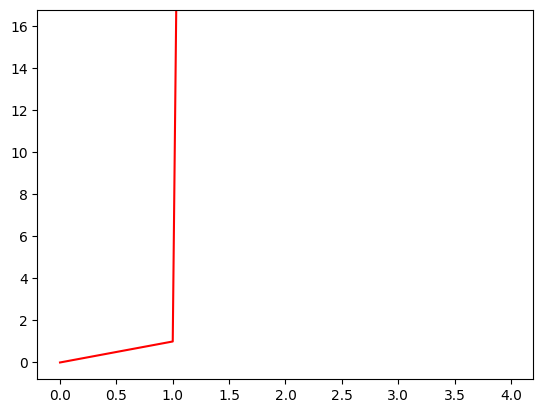

In [28]:
#visual test2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

# create a figure and axis
fig, ax = plt.subplots()
line, = ax.plot(x, y, 'r-')

def update(frame):
    line.set_ydata([i**frame for i in x])  # modify the data
    return line,  # must return iterable

# create the animation
ani = FuncAnimation(fig, update, frames=10, interval=500, blit=True)

# display the animation in google colab
HTML(ani.to_jshtml())

